In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('../Resources/theonion_articles_raw.csv')
df.dropna(inplace=True)

In [3]:
df.head()

,article_title,article_content
0,Blatant Rip-Off: The Main Character In ‘Ghost ...,"Well, gamers, this is a huge letdown. After ye..."
1,Deal Alert: An Advance Copy Of ‘Cyberpunk 2077...,"All aboard, gamers! We’ve uncovered a once-in-..."
2,"Get Excited, Gamers! Activision Shot Down A Fr...",Here is thrilling news that should have every ...
3,Come On: Someone Just Spray-Painted ‘Gamers Ru...,"Gamers, ever since our founding, we have pride..."
4,Brutal: Playstation Has Cancelled The Entire P...,"Well, Playstation fans, it looks like we’re al..."


In [4]:
# Converting all text to integers
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(df['article_title'])
df['title'] = tokenizer.texts_to_sequences(df['article_title'])

tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(df['article_content'])
df['content'] = tokenizer.texts_to_sequences(df['article_content'])

In [5]:
df.head()

,article_title,article_content,title,content
0,Blatant Rip-Off: The Main Character In ‘Ghost ...,"Well, gamers, this is a huge letdown. After ye...","[4471, 4472, 66, 6, 4473, 659, 3, 4474, 2, 447...","[124, 2052, 23, 11, 4, 941, 15652, 68, 87, 3, ..."
1,Deal Alert: An Advance Copy Of ‘Cyberpunk 2077...,"All aboard, gamers! We’ve uncovered a once-in-...","[333, 525, 146, 4478, 1243, 2, 1513, 1514, 32,...","[27, 4971, 2052, 1788, 5973, 4, 165, 6, 4, 239..."
2,"Get Excited, Gamers! Activision Shot Down A Fr...",Here is thrilling news that should have every ...,"[83, 282, 476, 4480, 661, 47, 10, 4481, 1515, ...","[169, 11, 5756, 326, 7, 162, 22, 108, 1604, 3,..."
3,Come On: Someone Just Spray-Painted ‘Gamers Ru...,"Gamers, ever since our founding, we have pride...","[769, 5, 662, 30, 2774, 4484, 4485, 4486, 5, 6...","[2052, 151, 153, 61, 4766, 30, 22, 22558, 2273..."
4,Brutal: Playstation Has Cancelled The Entire P...,"Well, Playstation fans, it looks like we’re al...","[2024, 663, 25, 2776, 6, 121, 1516, 160, 2777,...","[124, 3969, 999, 16, 809, 49, 824, 27, 2369, 4..."


C:\Users\Mommy\anaconda3\envs\dev\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


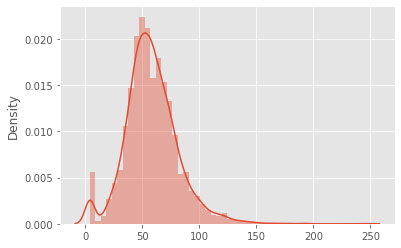

In [6]:
import seaborn as sns
# Plot the length of each headline title

X_lens = [len(x) for x in df['article_title'].values]
X_lens = np.array(X_lens)
sns.distplot(X_lens)

In [7]:
# calculate the mean article length
np.mean(X_lens)

58.141689373297005

In [8]:
# calculate the standard deviation of article length
np.std(X_lens)

23.068046803758367

Add twice the standard deviation to the mean to calculate the max tittle length, which turns out to be 104 words.

In [10]:
# Determine the number of titles that are greater or less than 104 words
MAX_TITLE = 104
np.unique((X_lens >= MAX_TITLE), return_counts=True)

(array([False,  True]), array([4245,  159], dtype=int64))

By performing the following calculation: 4245/(4245+159) = 96% of the titles are less than or equal to 104 words.

C:\Users\Mommy\anaconda3\envs\dev\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


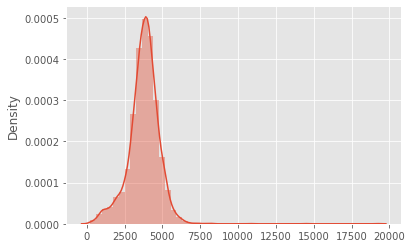

In [11]:
# Plot the length of the contents

X_lens = [len(x) for x in df['article_content'].values]
X_lens = np.array(X_lens)
sns.distplot(X_lens)

In [12]:
# calculate the mean article length
np.mean(X_lens)

3765.3294732061763

In [13]:
# calculate the standard deviation of article length
np.std(X_lens)

1016.8085151711746

Add twice the standard deviation to the mean to calculate the max tittle length, which turns out to be 5797 words.

In [15]:
# Determine the number of titles that are greater or less than 104 words
MAX_LENGTH = 5797
np.unique((X_lens >= MAX_LENGTH), return_counts=True)

(array([False,  True]), array([4341,   63], dtype=int64))

By performing the following calculation: 4341/(4341+63) = 98% of the titles are less than or equal to 5797 words.

In [16]:
# # Apply the maximum title by cutting off the titles that are too long 
# # Add 0 to the vectors for titles that are too short

X_train_title = tf.keras.preprocessing.sequence.pad_sequences(X_train_title,
                                              maxlen=MAX_TITLE,
                                              padding='post',
                                              truncating='post')
X_test_title = tf.keras.preprocessing.sequence.pad_sequences(X_test_title,
                                              maxlen=MAX_TITLE,
                                              padding='post',
                                              truncating='post')

# Apply the maximum title by cutting off the content articles that are too long 
# Add 0 to the vectors for content articles that are too short

X_train_text = tf.keras.preprocessing.sequence.pad_sequences(X_train_text,
                                              maxlen=MAX_LENGTH,
                                              padding='post',
                                              truncating='post')
X_test_text = tf.keras.preprocessing.sequence.pad_sequences(X_test_text,
                                              maxlen=MAX_LENGTH,
                                              padding='post',
                                              truncating='post')

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from string import punctuation
import os